# Rao-Cramer Inequality

One of the central theorems in parameter estimation. It defines the lower bound of estimation error based on chosen data model. Also it introduces the concept of estimation efficiency


# Statement
---
If $\hat{\theta}$ is some estimator for $\theta$ parameter then its variance is at least
$$\mathrm{Var}(\hat{\theta}) \geqslant \frac{1}{I(\theta)}$$
where $I(\theta)$ is a Fisher Information<br><br>

Mind the notation: $E_{\theta} \big[ U(x) \big]$ means that expectation is taken over x and depends on the external parameter $\theta$

# Proof
---
Intuitively, there is always some extent of uncertainty in data generation  and this amount cannot be compressed by any means during the estimation => there must be a lower bound of uncertainty which should be closely related to the data uncertainty

Assume $T(x)$ is a parameter estimate for a given data x. <br>Denote $U(x) = \frac{\partial}{\partial \theta} \log{f(x; \theta)}$ is a gradient of a likelihood function.

### Proof sketch
1. let's show how T relates to U by noticing that they are perfectly correlated $Cov[T, U]=1$
2. this allows us to express this relation in terms of individual variances using Cauchy-Schwarz inequity <br> $\textrm{Var}[Y] \cdot \textrm{Var}[U] \leqslant \textrm{Cov}[T U]$<br>or in the desired form <br>$Var[T] \leqslant \frac{1}{Var[U]} = \frac{1}{E^2[U]}$


### Proof

1.Let's proove the U property that we will need further: $\mathbb{E}(U(x)) = 0$

$$\mathbb{E}(U(x)) = \int \frac{\partial}{\partial \theta} log(f(x)) \, f(x) \, dx = \int \frac{f'}{f} \cdot f \, dx = 0$$This porperty means that on average the gradient U(x) flucatuates around zero. At zero the likelihood is optimal (in half of the cases optimum is on the left, in half - on the right)<br><br>

2.We assumed T(X) is unbiased
$$\frac{\partial}{\partial \theta} \mathbb{E}[T(x)] =  \frac{\partial}{\partial \theta} \, \theta = 1$$

It means the estimator changes proportionally to change in model $\theta$

On the other hand
$$\frac{\partial}{\partial \theta} \mathbb{E}[T(x)] = \int T(x) \, \frac{\partial}{\partial \theta}f(x) \delta{x} = \int T(x) U(x) f(x) \delta{x} = \mathbb{E}[T(x)U(x)]$$

The last expression is a covariance between T(x) and U(x). Let's get a closer look:

$$\mathrm{Cov}[T(x), U(x)] = E \big[ (T - \mathbb{E}[T]) \, (U-E[U]) \big]$$

Since $\mathbb{E}[T(X)]=\theta$ and $\mathbb{E}[U(x)]=0$

$$\mathrm{Cov}[T(x), U(x)] = \mathbb{E} \big[ (T(x) - \theta) \, U(x) \big] = \mathbb{E} \big[ T(x) \, U(x) \big] - \mathbb{E} \big[\theta \, U(x) \big] = \mathbb{E} \big[ T(x) \, U(x) \big]$$

Combining everything together we get: $$Cov(T, U) = 1$$

This means there is a perfect linear correlation between T(x) and U(x). When T(x) overestimated the real value, the optimum for the likelihood function must have been to the right of the real value

Now by applying Cauchy-Shwarz inequality we get:
$$\mathrm{Cov}^2(T, U) \leqslant \mathrm{Var}(T(x)) \cdot \mathrm{Var}(U(x))$$

This means:
$$1 \leqslant \mathrm{Var}(T(x)) \cdot \mathrm{Var}(U(x))$$

Or
$$\mathrm{Var}(T(x)) \geqslant \frac{1}{\mathrm{Var}(U(x))} = \frac{1}{\mathbb{E}(U(x) - \mathbb{E}(U(x)))^2} = \frac{1}{\mathbb{E}(U^2(x))}$$

Which proves the statement


# Cauchy-Schwarz Inequality
---
Let $X$ and $Y$ be real-valued random variables with finite second moments. Then<br>
$
\left( \mathbb{E}[XY] \right)^2 \leqslant \mathbb{E}[X^2] \cdot \mathbb{E}[Y^2]
$<br>

If we substitute $X$ with its centered versions $X - E[X]$ then<br>
$
\left( \mathrm{Cov}(X, Y) \right)^2 \leqslant \mathrm{Var}(X) \cdot \mathrm{Var}(Y)
$

This expression gives Pearson coefficient<br>
$
\left| \mathrm{Cov}(X, Y) \right| \leqslant \sqrt{\mathrm{Var}(X)} \cdot \sqrt{\mathrm{Var}(Y)}
$

__Proof__ is not very interesting<br>Construct a new variable $(X - \lambda Y)^2$ and compute expectation of it. Minimum possible value is greater than zero. Minumum value would be $
\mathbb{E}[X^2] - \frac{\mathbb{E}[XY]^2}{\mathbb{E}[Y^2]} \geqslant 0
$


# Fisher Information
---
Assume $\theta$ = data distribution parameter, $x$ = data, $f(x;\theta)$ = data distribution

$$I(\theta) = \mathrm{Var} \bigg(\frac{\partial{}}{\partial{\theta}} \log{f(x ; \theta)}\bigg) = \mathrm{Var} \bigg(\frac{f'(x;\theta)}{f(x;\theta)}\bigg)$$


Derivative is taken over $\theta$. The variance is taken over X.

There is an alternative expression:
$$I(\theta) = \mathrm{Var} \bigg(\frac{\partial{}}{\partial{\theta}} \log{P(x | \theta)}\bigg) = \mathbb{E} \bigg[ \big(\frac{\partial{}}{\partial{\theta}} \log{P(x | \theta)} \big)^2 \bigg]$$

Why? Because $\mathrm{Var}(U) = E[U^2] - (EU)^2 = E[U^2]$

There is another way to write this expression through second derivative:

$$I(\theta) = E_X \bigg[ \frac{\partial{}}{\partial{\theta^2}} \log{P(x | \theta)} \bigg]$$

Fisher information is a measure of loglikelihood function "peakiness"
To what degree the choice of $\theta$ determines the preferred result

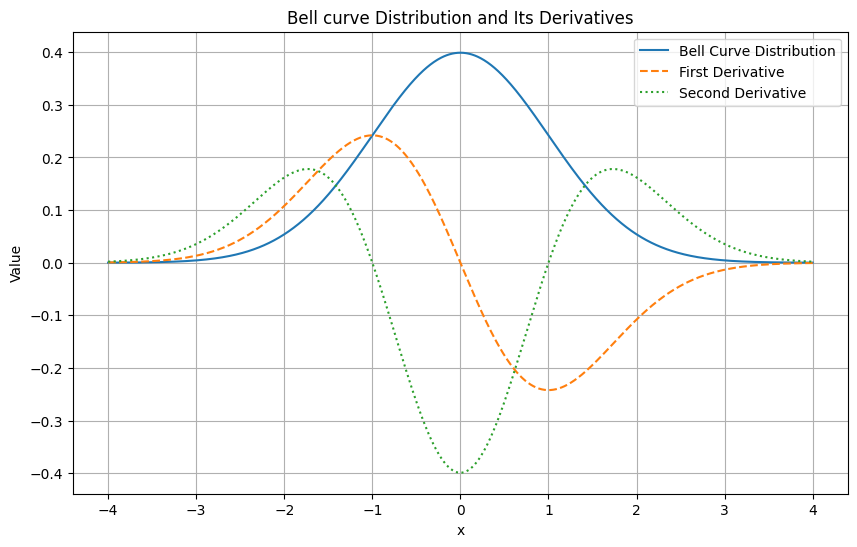

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the normal distribution
x = np.linspace(-4, 4, 1000)  # Range of x values
mu, sigma = 0, 1  # Mean and standard deviation
pdf = norm.pdf(x, mu, sigma)  # Probability density function (PDF)

# Compute first and second derivatives
first_derivative = - (x / sigma**2) * pdf
second_derivative = ((x**2 - sigma**2) / sigma**4) * pdf

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="Bell Curve Distribution")
plt.plot(x, first_derivative, label="First Derivative", linestyle="dashed")
plt.plot(x, second_derivative, label="Second Derivative", linestyle="dotted")

# Labels and legend
plt.xlabel("x")
plt.ylabel("Value")
plt.title("Bell curve Distribution and Its Derivatives")
plt.legend()
plt.grid()
plt.show()